# Bike-Sharing Rental System - Washington D.C., USA

The objective is to clean, wrangle the dataset and address to scenario given by the CEO 

In [162]:
# Load the 'Tidyverse'
library(tidyverse)

Rows: 17,379
Columns: 17
$ instant    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1...
$ dteday     <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01...
$ season     <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ yr         <chr> "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "...
$ mnth       <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "...
$ hr         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ holiday    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ weekday    <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...
$ workingday <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ weathersit <fct> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3,...
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0....
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, ...
$ hum        <dbl> 0.81, 0.

    instant          dteday           season        yr           
 Min.   :    1   Min.   :2011-01-01   1:4242   Length:17379      
 1st Qu.: 4346   1st Qu.:2011-07-04   2:4409   Class :character  
 Median : 8690   Median :2012-01-02   3:4496   Mode  :character  
 Mean   : 8690   Mean   :2012-01-02   4:4232                     
 3rd Qu.:13034   3rd Qu.:2012-07-02                              
 Max.   :17379   Max.   :2012-12-31                              
     mnth                 hr         holiday           weekday     
 Length:17379       Min.   : 0.00   Mode :logical   Min.   :0.000  
 Class :character   1st Qu.: 6.00   FALSE:16879     1st Qu.:1.000  
 Mode  :character   Median :12.00   TRUE :500       Median :3.000  
                    Mean   :11.55                   Mean   :3.004  
                    3rd Qu.:18.00                   3rd Qu.:5.000  
                    Max.   :23.00                   Max.   :6.000  
 workingday      weathersit      temp           atemp         

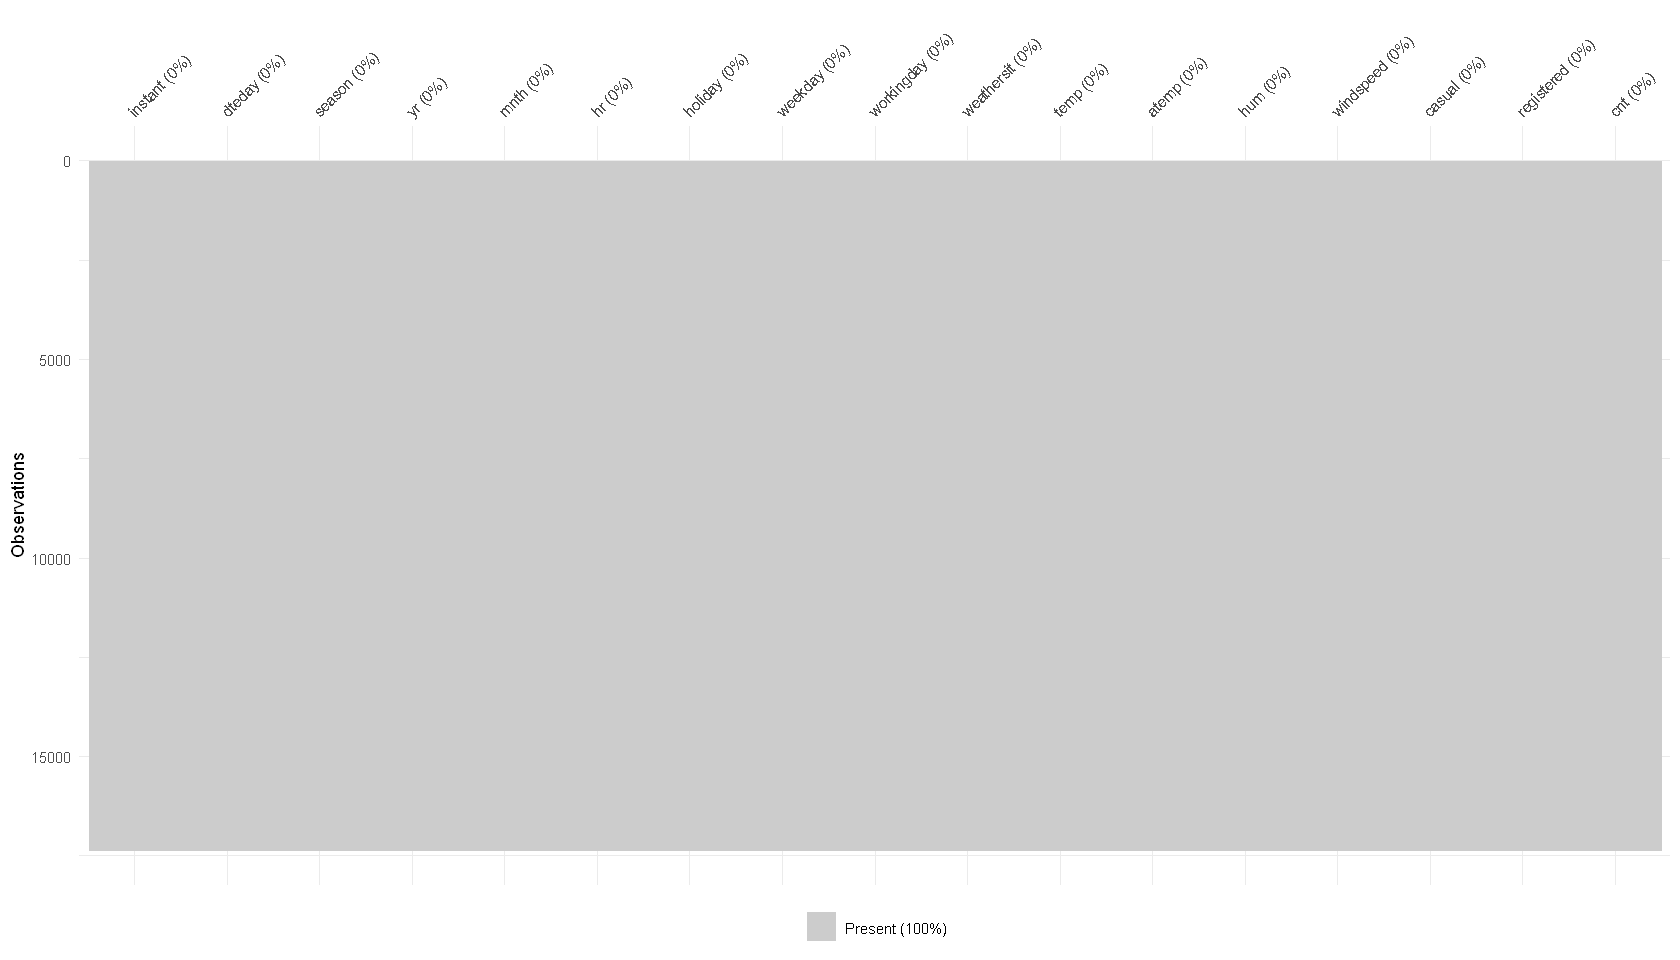

In [163]:
# Import the "hour.csv" dataset as a dataframe, specifying the type of the columns, guessed incorrectly by
# the read_csv, as per the description given in the file `DataSet_Dictionary.txt`.
bike_df <- "hour.csv" %>%
  read_csv(col_types = cols(
      dteday = col_date(format = "%d-%m-%Y"),
      season = col_factor(),
      yr = col_character(),
      mnth = col_character(),
      holiday = col_logical(),
      workingday = col_logical(),
      weathersit = col_factor()
      )
  )

# Get a glimpse of the dataset.
glimpse(bike_df)

# Use `vis_miss()` from `vis_dat` to get a grip of how the missingness in the data is distributed.
library(visdat)
bike_df %>%
  vis_miss(large_data_size = 9e+07)

# Summarize the dataset.
bike_df %>% 
  summary()

It can be observed from the missingness plot that there is no missingness present in the data.

In [164]:
# Function to extract top n ("num" argument of the function, defaults to 10) counts of total rental 
# bikes (sorted in descending order) from the dataset for the year ("year" argument of the function, defaults to 2011) 
# and month ("month" argument of the function, defaults to 1) chosen by the user. 
top_bikes_cnt <- function(year = 0, month = 1, num = 10) {
  new_bike_df <- bike_df %>%
                   filter(yr == year, mnth == month) %>%
                   top_n(num, cnt) %>%
                   arrange(desc(cnt))
  return(new_bike_df) # return the filtered dataframe
}

# Calling the defined function to filter top 5 counts of total rental bikes
# from the dataset for the 2nd month of year 2012.
top_bikes_cnt(year = 1, month = 2, num = 5)
      

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<fct>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9929,2012-02-23,1,1,2,17,FALSE,4,TRUE,1,0.54,0.5152,0.32,0.1642,49,561,610
9896,2012-02-22,1,1,2,8,FALSE,3,TRUE,1,0.30,0.3182,0.75,0.0896,9,567,576
9920,2012-02-23,1,1,2,8,FALSE,4,TRUE,1,0.34,0.3333,0.87,0.1940,11,549,560
10040,2012-02-28,1,1,2,8,FALSE,2,TRUE,1,0.26,0.2424,0.48,0.2836,16,543,559
9404,2012-02-01,1,1,2,17,FALSE,3,TRUE,1,0.58,0.5455,0.43,0.1940,31,508,539


In [165]:
bike_df %>%
  # Select all the columns from the dataset, dropping "yr" and "mnth" columns.
  select(-c(yr, mnth)) %>%
  # Rename certain columns in order to make them more meaningful and comprehensible.
  rename(c("date" = "dteday", "is_holiday" = "holiday", "is_workingday" = "workingday" )) %>%
  # Reordering the columns.
  select(instant:date, hr, weekday, is_holiday, is_workingday, season, weathersit:cnt)


instant,date,hr,weekday,is_holiday,is_workingday,season,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<lgl>,<lgl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,0,6,FALSE,FALSE,1,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,6,FALSE,FALSE,1,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,2,6,FALSE,FALSE,1,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,3,6,FALSE,FALSE,1,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,4,6,FALSE,FALSE,1,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,5,6,FALSE,FALSE,1,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,6,6,FALSE,FALSE,1,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,7,6,FALSE,FALSE,1,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,8,6,FALSE,FALSE,1,1,0.24,0.2879,0.75,0.0000,1,7,8


In [166]:
bike_df %>%
  # Append two new columns, "atemperature" and "wind_speed" to the dataframe with
  # "atemperature": rounded "atemp" to 2dp,
  # "wind_speed": rounded "windspeed" to 2dp.
  mutate(atemperature = atemp %>% round(digits = 2),
         wind_speed = windspeed %>% round(digits = 2)) %>%
  # Converting the mutated dataframe into a grouped dataframe grouped by 
  # the variables "temp", "atemperature", "hum", and "wind_speed".
  group_by(temp, atemperature, hum, wind_speed) %>%
  # Count the number of rows falling under each group. 
  tally() %>%
  arrange(desc(n))

# Summing up all the counts of total rental bikes corresponding to all the rows in the dataframe.
bike_df %>% summarise(cnt_tot = sum(cnt))

bike_df %>%
  # Converting the dataframe into a grouped dataframe grouped by 
  # the variables "yr" and "season".
  group_by(yr, season) %>%
  # Summing up all the counts of total rental bikes corresponding to the rows falling 
  # under the groups formed in the dataframe.
  summarise(cnt_tot = sum(cnt)) %>%
  # Arranging the rows in the resulting dataframe in decreasing order of counts values. 
  arrange (desc(cnt_tot))

temp,atemperature,hum,wind_speed,n
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.62,0.55,0.94,0.00,25
0.62,0.58,0.83,0.00,20
0.66,0.61,0.83,0.16,20
0.60,0.55,0.88,0.09,18
0.62,0.56,0.88,0.00,18
0.64,0.58,0.89,0.00,18
0.66,0.61,0.83,0.09,18
0.40,0.41,0.87,0.00,17
0.60,0.55,0.88,0.00,17


cnt_tot
<dbl>
3292679


`summarise()` regrouping output by 'yr' (override with `.groups` argument)



yr,season,cnt_tot
<chr>,<fct>,<dbl>
1,3,641479
1,2,571273
1,4,515476
0,3,419650
0,2,347316
0,4,326137
1,1,321348
0,1,150000


In [167]:
library(tidyr)

# Create a wide dataframe with additional columns "1", "2", "3", amd "4"
# corresponding to the factors of the variable "season" in the original
# dataframe format. The values under the aforementioned columns correspond to 
# the count of total rental bikes, "cnt". 
wide_bike_df <- bike_df %>%
                  spread(key = season,
                         value = cnt)
wide_bike_df

# Create a long dataframe out of the wide dataframe format with the 
# columns "1", "2", "3", and "4" merging together to form a single column
# "season" and the corresponding values forming a single column "cnt" in the resulting
# dataframe.
long_bike_df <- wide_bike_df %>% 
                  gather(key = season, 
                         value = cnt,
                         c("1":"4")) %>%
                  # Remove the rows with missing value.
                  na.omit() %>%
                  # Reordering the columns.
                  select(instant:dteday, season, yr:cnt)                
long_bike_df

instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,1,2,3,4
<dbl>,<date>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,0,1,0,FALSE,6,FALSE,1,0.24,0.2879,0.81,0.0000,3,13,16,NA,NA,NA
2,2011-01-01,0,1,1,FALSE,6,FALSE,1,0.22,0.2727,0.80,0.0000,8,32,40,NA,NA,NA
3,2011-01-01,0,1,2,FALSE,6,FALSE,1,0.22,0.2727,0.80,0.0000,5,27,32,NA,NA,NA
4,2011-01-01,0,1,3,FALSE,6,FALSE,1,0.24,0.2879,0.75,0.0000,3,10,13,NA,NA,NA
5,2011-01-01,0,1,4,FALSE,6,FALSE,1,0.24,0.2879,0.75,0.0000,0,1,1,NA,NA,NA
6,2011-01-01,0,1,5,FALSE,6,FALSE,2,0.24,0.2576,0.75,0.0896,0,1,1,NA,NA,NA
7,2011-01-01,0,1,6,FALSE,6,FALSE,1,0.22,0.2727,0.80,0.0000,2,0,2,NA,NA,NA
8,2011-01-01,0,1,7,FALSE,6,FALSE,1,0.20,0.2576,0.86,0.0000,1,2,3,NA,NA,NA
9,2011-01-01,0,1,8,FALSE,6,FALSE,1,0.24,0.2879,0.75,0.0000,1,7,8,NA,NA,NA


instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,FALSE,6,FALSE,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,FALSE,6,FALSE,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,FALSE,6,FALSE,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,FALSE,6,FALSE,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,FALSE,6,FALSE,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,FALSE,6,FALSE,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,FALSE,6,FALSE,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,FALSE,6,FALSE,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,FALSE,6,FALSE,1,0.24,0.2879,0.75,0.0000,1,7,8


The original dataframe "bike_df" is already tidy owing to the fact that
1. each variable has its own column.
2. each observation has its own row.
3. each value has its own cell.

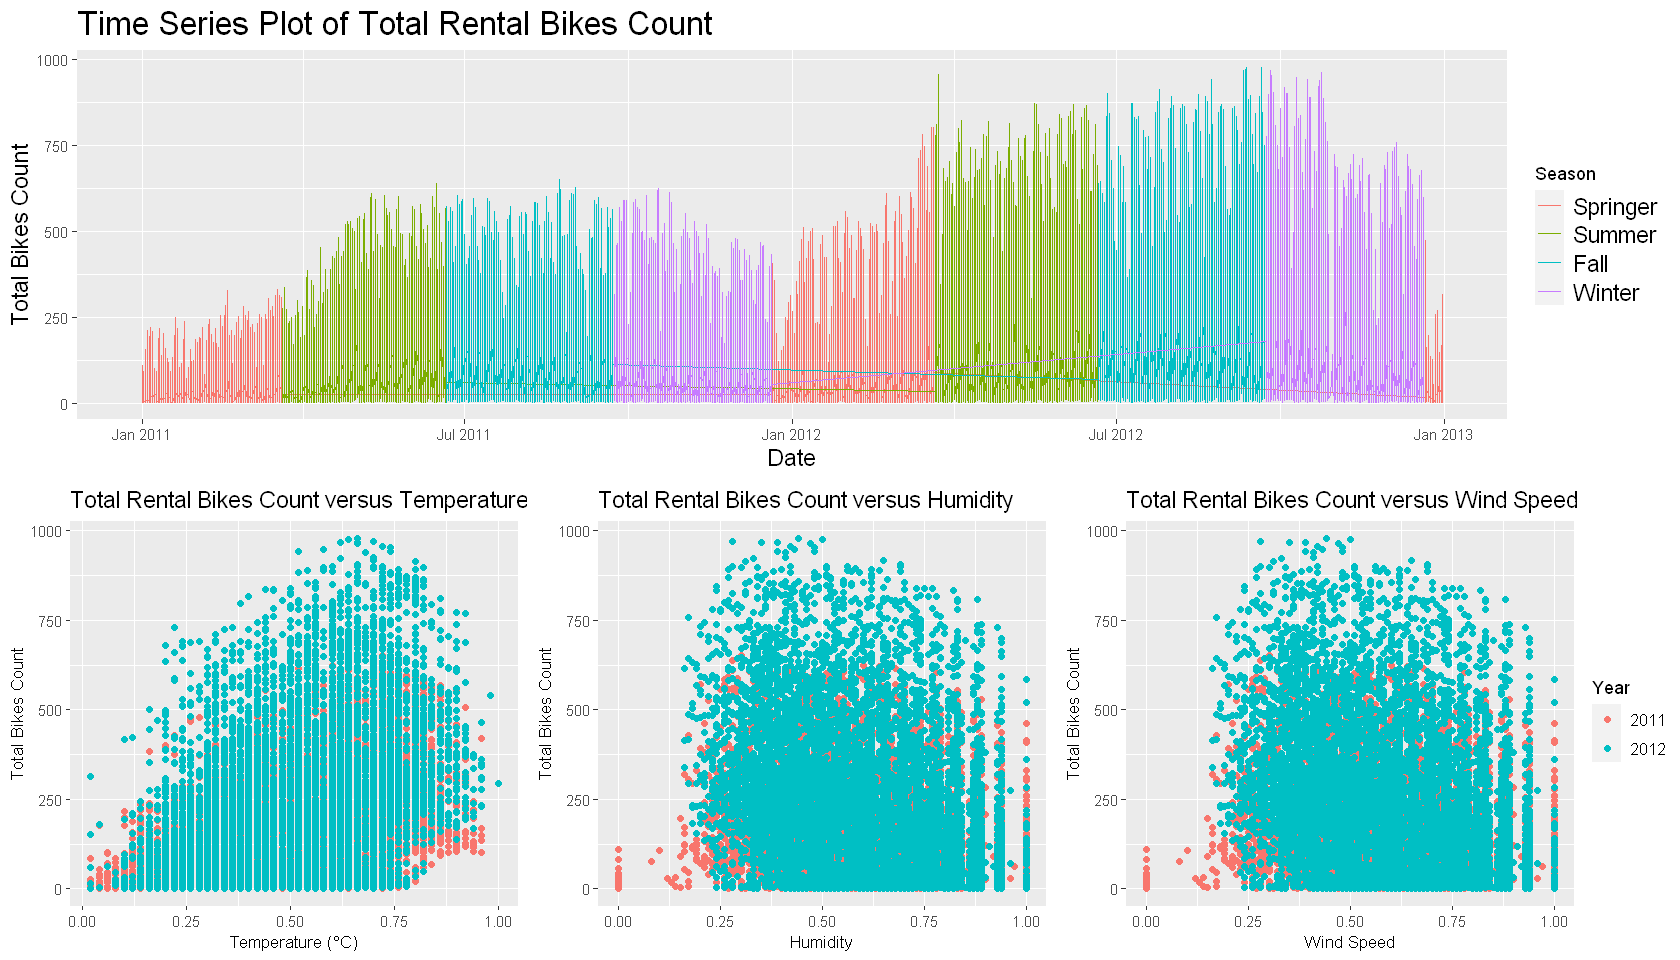

In [168]:
#install.packages("ggpubr")
library(ggpubr)

#Time series plot of total rental bikes count.
bikescount_time_plot <- ggplot(data = bike_df, aes(x = dteday, y = cnt, color = season))+
                        geom_line() +
                        scale_x_date(date_labels = "%b %Y") +
                        labs(title = "Time Series Plot of Total Rental Bikes Count",
                             x = "Date",
                             y = "Total Bikes Count") +
                        theme(plot.title = element_text(size = 20),
                              axis.title.x = element_text(size = 14),
                              axis.title.y = element_text(size = 14),
                              legend.text = element_text(size = 14)) +
                        scale_colour_discrete(name  ="Season",
                                              breaks = c("1", "2", "3", "4"),
                                              labels = c("Springer", "Summer", "Fall", "Winter"))
                    
# Scatter plot between total rental bikes count and temperature.               
bikescount_temp_plot <- ggplot(data = bike_df, aes(x = temp, y = cnt, color = yr)) + 
                        geom_point() +
                        labs(title = "Total Rental Bikes Count versus Temperature",
                             x = "Temperature (°C)",
                             y = "Total Bikes Count") +
                        theme(plot.title = element_text(size = 14),
                              axis.title.x = element_text(size = 10),
                              axis.title.y = element_text(size = 10),
                              legend.text = element_text(size = 10)) +
                        scale_colour_discrete(name  ="Year",
                                              breaks = c("0", "1"),
                                              labels = c("2011", "2012"))
                        
# Scatter plot between total rental bikes count and humidity.
bikescount_hum_plot <- ggplot(data = bike_df, aes(x = hum, y = cnt, color = yr)) + 
                       geom_point() +
                       labs(title = "Total Rental Bikes Count versus Humidity",
                            x = "Humidity",
                            y = "Total Bikes Count",
                            color = "Year") +
                       theme(plot.title = element_text(size = 14),
                             axis.title.x = element_text(size = 10),
                             axis.title.y = element_text(size = 10),
                             legend.text = element_text(size = 10))
                       
# Scatter plot between total rental bikes count and wind speed.
bikescount_windspeed_plot <- ggplot(data = bike_df, aes(x = hum, y = cnt, color = yr)) + 
                             geom_point() +
                             labs(title = "Total Rental Bikes Count versus Wind Speed",
                                  x = "Wind Speed",
                                  y = "Total Bikes Count",
                                  color = "Year") +
                             theme(plot.title = element_text(size = 14),
                                   axis.title.x = element_text(size = 10),
                                   axis.title.y = element_text(size = 10),
                                   legend.text = element_text(size = 10))

# Combining all the above ggplots into a figure. 
options(repr.plot.width = 14, repr.plot.height = 8)
bike_df_plot <- ggarrange(bikescount_time_plot,
                          ggarrange(bikescount_temp_plot, 
                                    bikescount_hum_plot, 
                                    bikescount_windspeed_plot, 
                                    ncol = 3,
                                    legend = "right",
                                    common.legend = TRUE), 
                          nrow = 2)
bike_df_plot


In [169]:
# Save the tidy dataset to disk.
bike_df %>%
  write_csv("Bike_sharing_data.csv")

# Save the plot from task (f) to disk as a pdf file. 
ggsave("bike_sharing_data_plot.pdf", 
       plot = bike_df_plot,
       width = 15, 
       height = 12, 
       units = "in")


### Scenario to Address

You are the data scientist working for a bike rental company. The `hour.csv` is the data you have available. The bike rental CEO sometimes wakes up in the morning with these strange ideas, and you get to test them.

One of the key element for the company is being sure that there are always enough bikes available for the users. So, we need to understand what makes a user rent a bike and what makes a user NOT rent a bike.
Your CEO noticed thinks that one of the peak times for the registered users renting bikes is between 6am and 10am.

Task (1): Make a plot to check that (take seasonality into account in the plot).

She also thought about an interesting hypothesis. A registered user usually finish working around 5pm. Between 5pm and 10pm, they notice the weather: in particular, the registered users are sensible to how good the weather is, and how stable it is. The morning after, between 6am and 10am, the amount of registered users renting a bike to go to work depends on the previous afternoon weather.

Task (2): Make one or more plot to test this hypothesis (again, consider seasonality in the plot).

`summarise()` regrouping output by 'yr', 'season' (override with `.groups` argument)



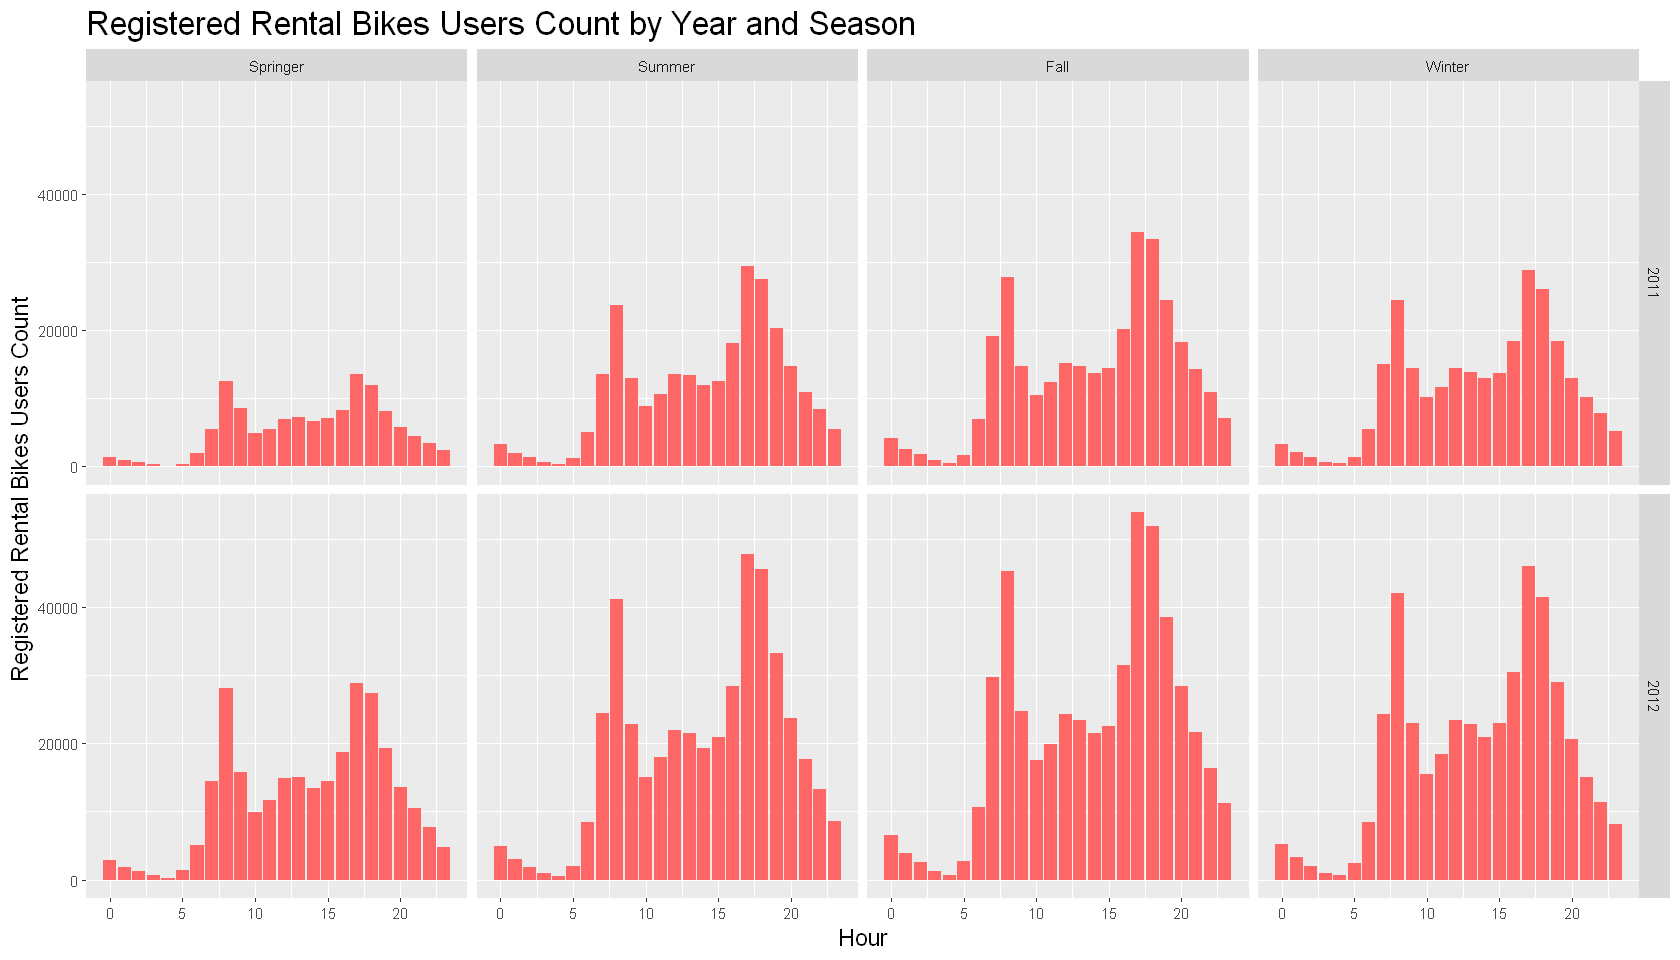

In [170]:
# TASK (1)
grouped_data1 <- bike_df %>%
                  group_by(yr, season, hr) %>%
                  summarise(registered_cnt_tot = sum(registered))

year_labels <- c("0" = "2011", "1" = "2012")
season_labels <- c("1" = "Springer", "2" = "Summer", "3" = "Fall", "4" = "Winter")

ggplot(data = grouped_data1, aes(x = hr, y = registered_cnt_tot)) +
  labs(title = "Registered Rental Bikes Users Count by Year and Season",
       x = "Hour",
       y = "Registered Rental Bikes Users Count") +
  theme(plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14)) +
  geom_bar(stat = "identity", fill = "#FF6666") +
  facet_grid(yr ~ season, labeller = labeller(yr = labels, season = season_labels))

It can be observed from the illustrations that the CEO's claim that one of the peak times for the registered users renting bikes is between 6AM and 10AM is not correct, it's between 4PM and 8PM instead.      

`summarise()` regrouping output by 'season' (override with `.groups` argument)

`summarise()` regrouping output by 'season' (override with `.groups` argument)



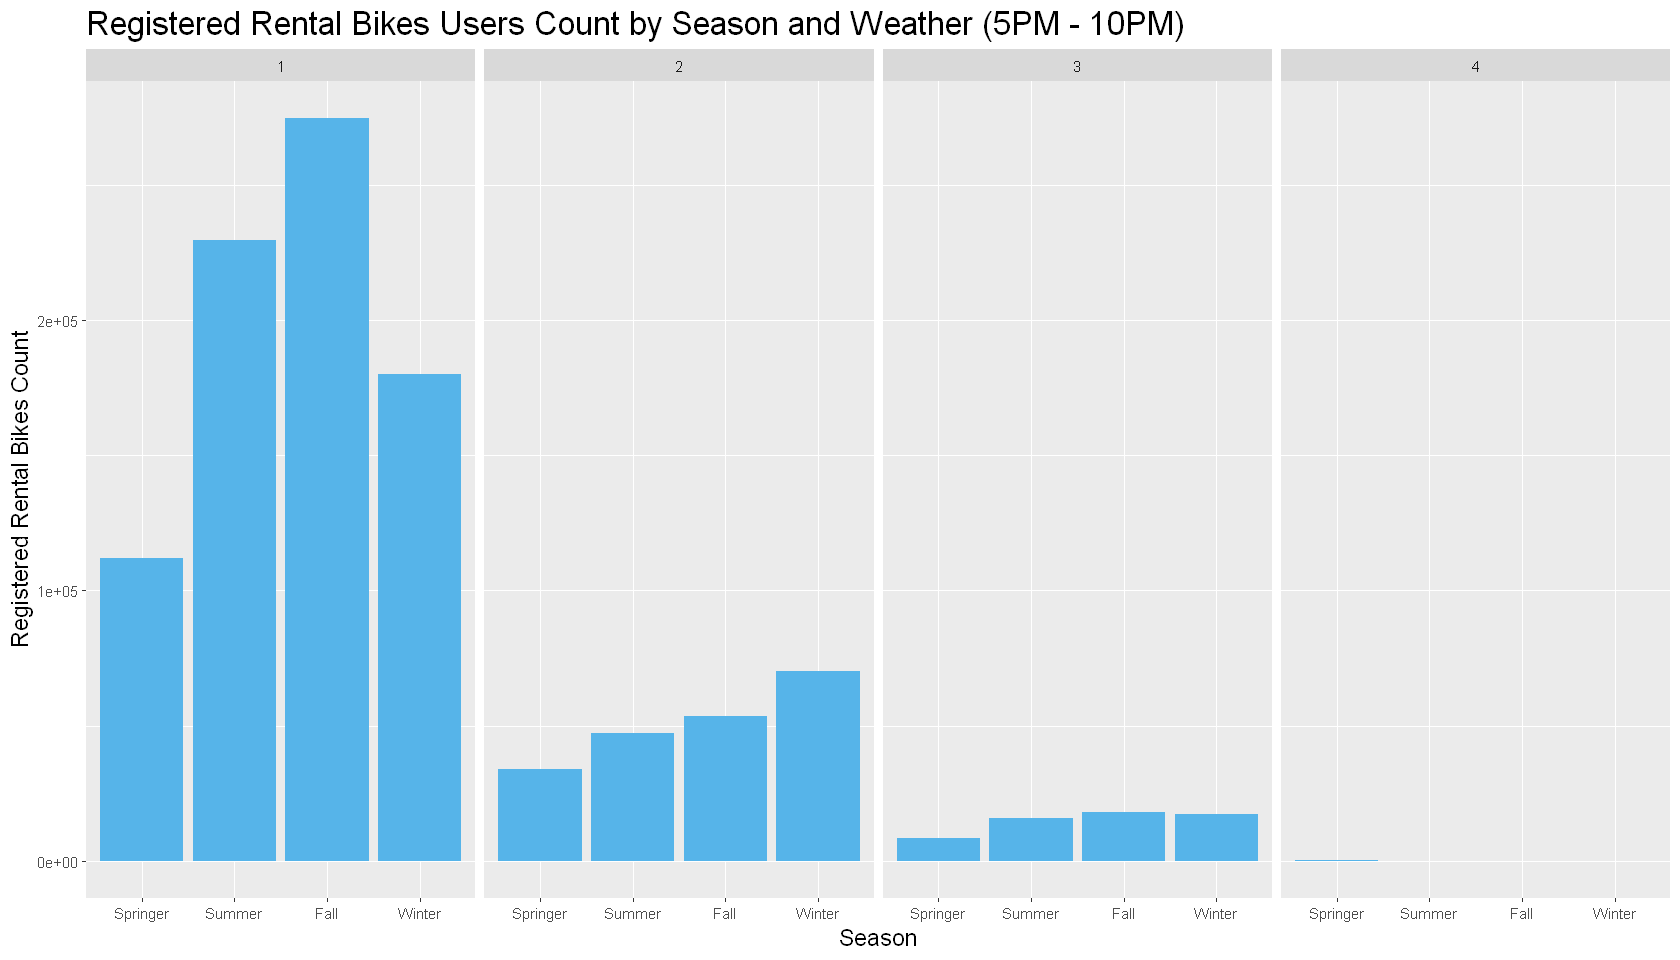

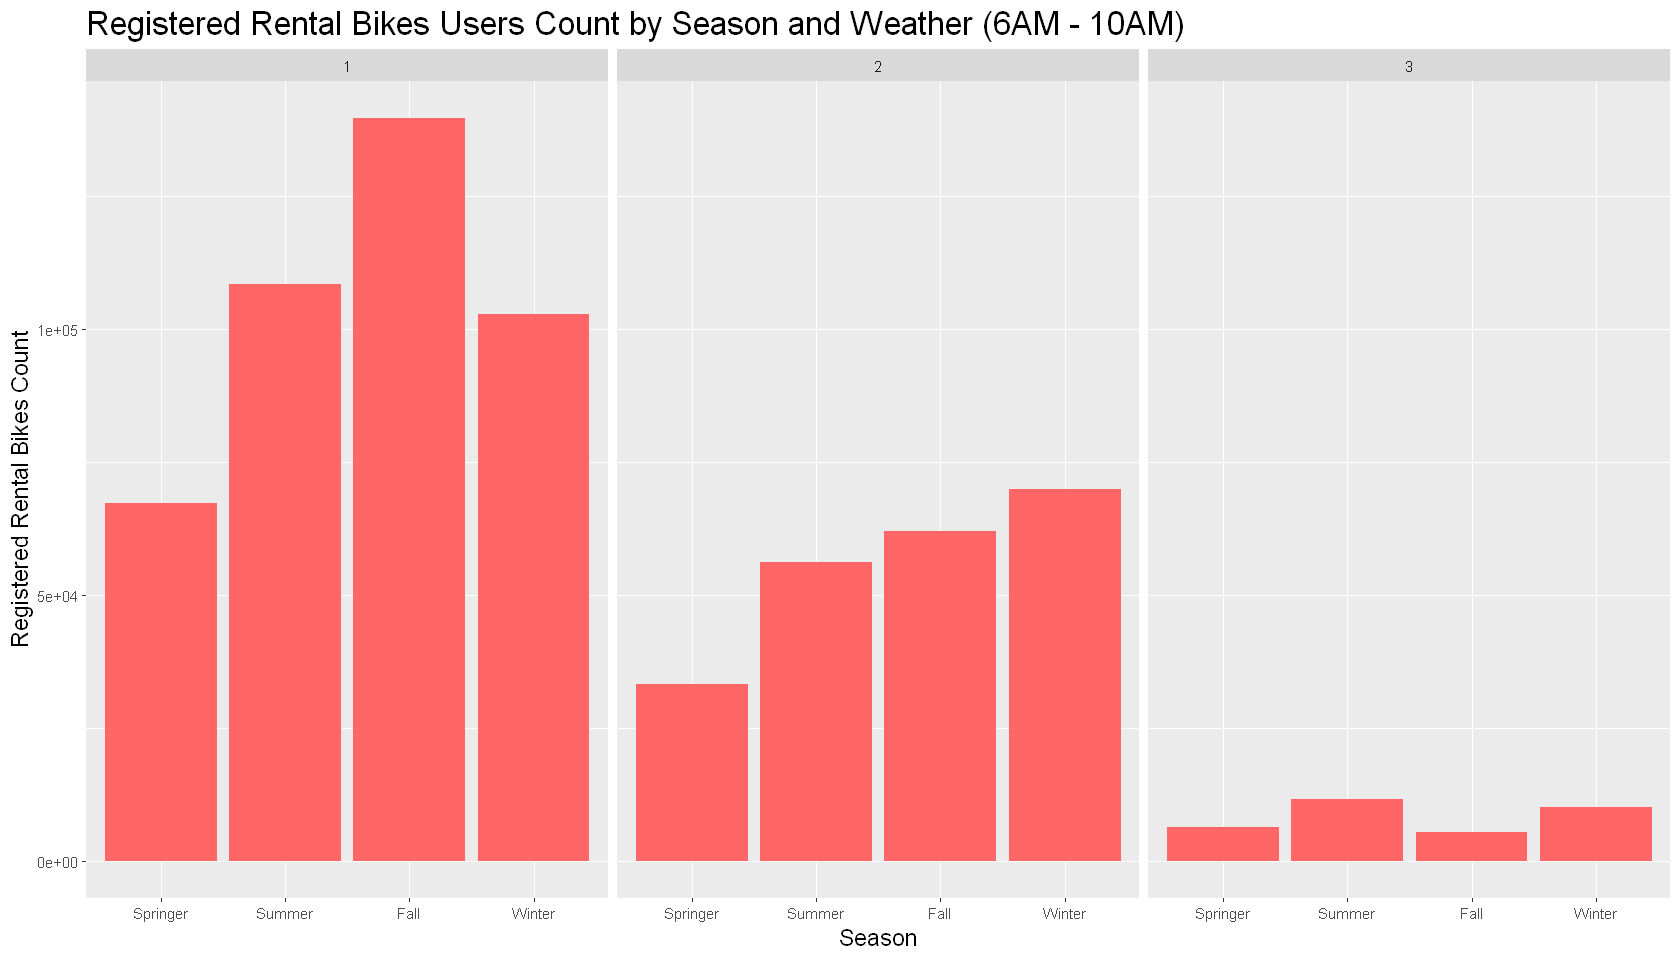

In [171]:
# TASK (2)
grouped_data2 <- bike_df %>%
                  # Filter the data corresponding to the time interval 6AM -10AM 
                  filter(hr %in% 6:10) %>%
                  group_by(season, weathersit) %>%
                  summarise(registered_cnt_tot = sum(registered))

grouped_data3 <- bike_df %>%
                  # Filter the data corresponding to the time interval 5PM -10PM 
                  filter(hr %in% 17:22) %>%
                  group_by(season, weathersit) %>%
                  summarise(registered_cnt_tot = sum(registered))

ggplot(data = grouped_data3, aes(x = season, y = registered_cnt_tot)) +
  labs(title = "Registered Rental Bikes Users Count by Season and Weather (5PM - 10PM)",
       x = "Season",
       y = "Registered Rental Bikes Count") +
  theme(plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14)) +
  geom_bar(stat = "identity", fill = "#56B4E9") +
  facet_grid( .~ weathersit) +
  scale_x_discrete(breaks=c("1", "2", "3", "4"),
                   labels=c("Springer", "Summer", "Fall", "Winter"))

ggplot(data = grouped_data2, aes(x = season, y = registered_cnt_tot)) +
  labs(title = "Registered Rental Bikes Users Count by Season and Weather (6AM - 10AM)",
       x = "Season",
       y = "Registered Rental Bikes Count") +
  theme(plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14)) +
  geom_bar(stat = "identity", fill = "#FF6666") +
  facet_grid( .~ weathersit) +
  scale_x_discrete(breaks=c("1", "2", "3", "4"),
                   labels=c("Springer", "Summer", "Fall", "Winter"))